In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

In [11]:
# 读取一年的pm25数据
data = pd.read_csv('./PMdata_2010-2014.csv',encoding='gbk')
data.head()

,year,month,day,hour,value
0,2010,1,2,0,129
1,2010,1,2,1,148
2,2010,1,2,2,159
3,2010,1,2,3,181
4,2010,1,2,4,138


In [8]:
print(len(data['value']))
len(data.loc[data.value==NA,:])

43800


NameError: name 'NA' is not defined

In [7]:
# 计算现在是否还存在观测值错误或者记录错误的
print(len(data['Value']))
len(data.loc[data.Value<0,:])

8760


75

In [10]:
# 对于只空缺一个值，补为平均值
for i in range(len(data['Value'])):
    if data['Value'][i] == -999:
        data['Value'][i] = (data['Value'][i-1] + data['Value'][i+1]) / 2
        print(data['Value'][i])
# 如果补充完还是负值，删除对应的信息
data.loc[data.Value<0,'Value'] = np.nan
data.dropna(inplace=True)
data.head()

KeyError: 3279

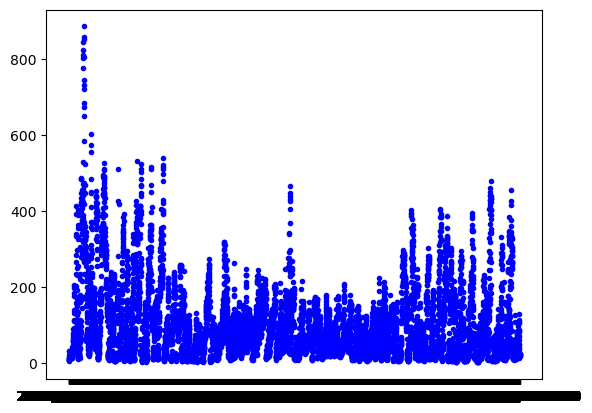

ADF Statistic:-11.41578758727961
p-value:7.068062306722097e-21
Critial Values:
1%,-3.4311024711871725
Critial Values:
5%,-2.8618725419979762
Critial Values:
10%,-2.566947007147539


In [14]:
#data.head()
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

plt.plot_date(data.timestamp, data.Value, fmt='b.')
plt.show()
fuller_result = adfuller(data['Value'],autolag='AIC')
print(f'ADF Statistic:{fuller_result[0]}')
print(f'p-value:{fuller_result[1]}')
for key, value in fuller_result[4].items():
    print('Critial Values:')
    print(f'{key},{value}')